In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston # 
from sklearn.preprocessing import MinMaxScaler,StandardScaler #

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle
import json
import warnings
warnings.filterwarnings("ignore")

## 1) Problem Statment

In [ ]:
# Predict the house price 

## 2) Data Gathering & Data Validation

In [7]:
boston_load = load_boston()
df = pd.DataFrame(boston_load.data,columns=boston_load.feature_names)
df["Price"] = boston_load.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 3) EDA

In [8]:
# df.info()
# df.isna().sum()
df.isna().mean()*100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
Price      0.0
dtype: float64

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

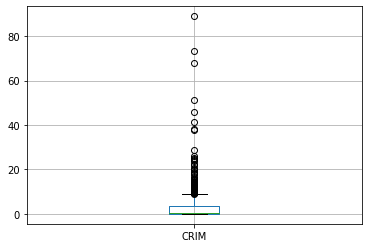

In [11]:
df[["CRIM"]boxplot()

<AxesSubplot:xlabel='CRIM'>

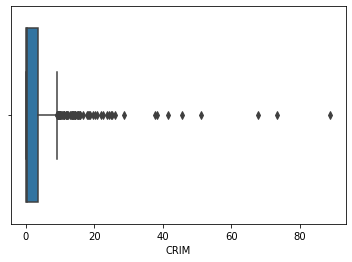

In [10]:
sns.boxplot(df["CRIM"])

## Model Training and Model Selection

In [12]:
x = df.drop("Price",axis=1)
y = df["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45)

In [13]:
knn_reg = KNeighborsRegressor() # k=5,p=2 (E.D)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

## Evaluation

In [14]:

# Testing
y_pred_test = knn_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)

R2_Score = r2_score(y_test,y_pred_test)
print("R2 score",R2_Score)

MSE 54.72087244094489
mae 5.276692913385826
R2 score 0.45995789449105906


In [15]:
# Training
y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)

R2_Score = r2_score(y_train,y_pred_train)
print("R2 score",R2_Score)

MSE 23.38893403693931
mae 3.3179419525065965
R2 score 0.7029362280159883


## Linear_regression

In [18]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [19]:
# Testing
y_pred_test = lr_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)

R2_Score = r2_score(y_test,y_pred_test)
print("R2 score",R2_Score)

MSE 25.150352516949603
mae 3.685196949910204
R2 score 0.7517903366361053


## Hyperparameter Tuning

In [ ]:
# p=2 & k=?
# p=1 & k=?

Text(0.5, 1.0, 'Comparison Between Training and Testing Accuracies')

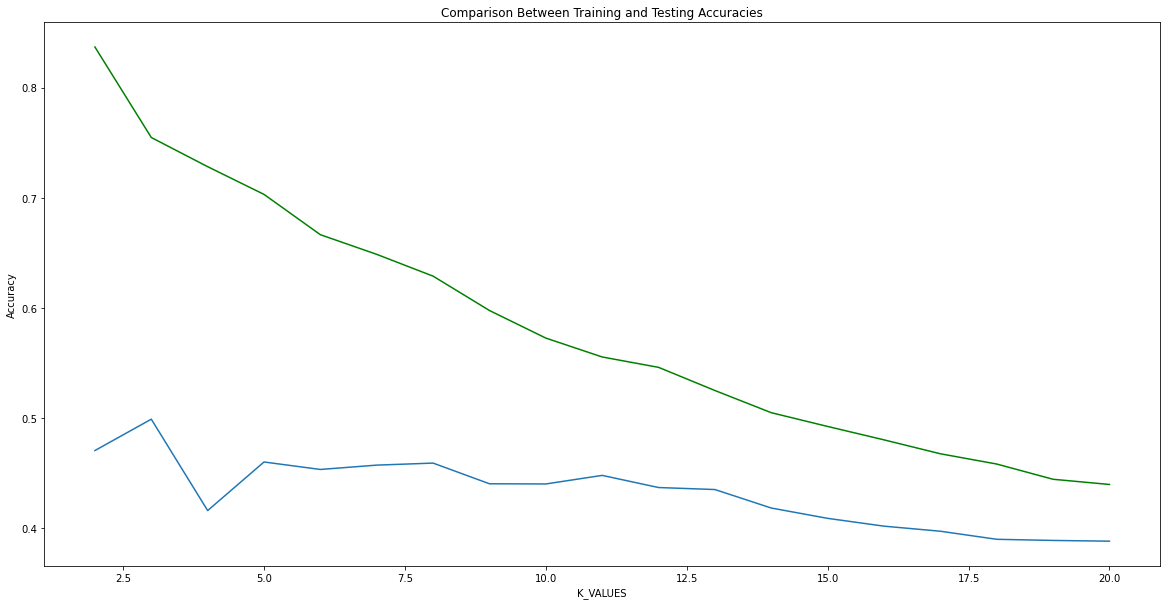

In [26]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    # Training
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    # Testing
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color="green")
plt.plot(k_values,r2_test_list)
plt.xlabel("K_VALUES")
plt.ylabel("Accuracy")
plt.title("Comparison Between Training and Testing Accuracies")



Text(0.5, 1.0, 'Comparison Between Training and Testing Accuracies')

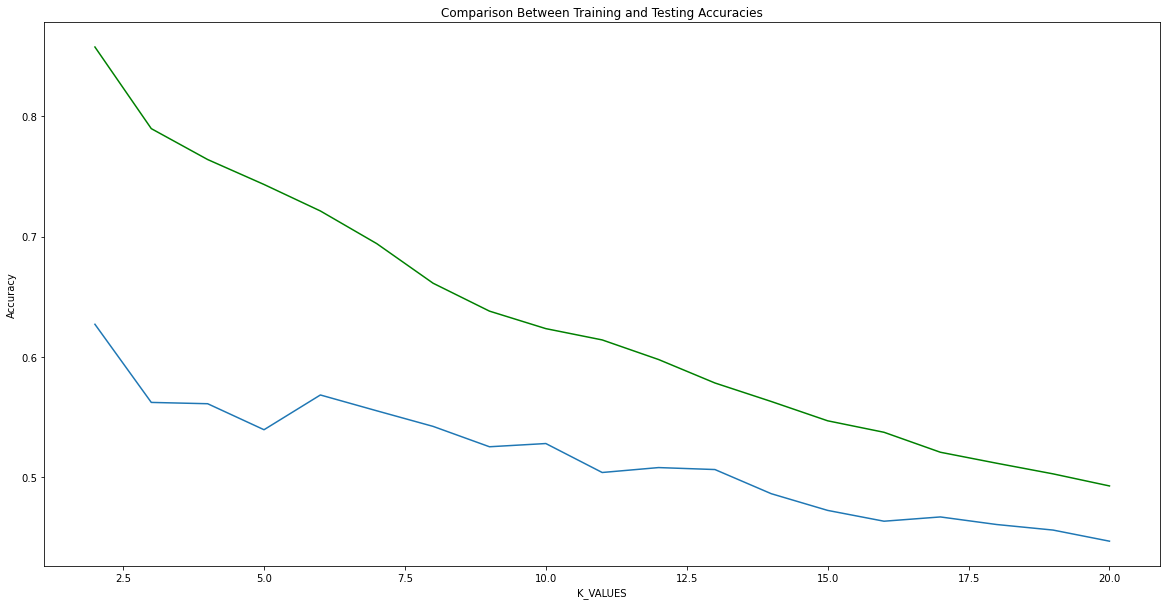

In [27]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    # Training
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    # Testing
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color="green")
plt.plot(k_values,r2_test_list)
plt.xlabel("K_VALUES")
plt.ylabel("Accuracy")
plt.title("Comparison Between Training and Testing Accuracies")



In [ ]:
# k=2,p=1

In [28]:
knn_reg = KNeighborsRegressor(n_neighbors=2,p=1) # k=5,p=2 (E.D)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [29]:

# Testing
y_pred_test = knn_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)

R2_Score = r2_score(y_test,y_pred_test)
print("R2 score",R2_Score)

MSE 37.774468503937015
mae 4.349212598425197
R2 score 0.6272025171498696


In [30]:
# Training
y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)

R2_Score = r2_score(y_train,y_pred_train)
print("R2 score",R2_Score)

MSE 11.228509234828495
mae 2.1242744063324537
R2 score 0.8573862621619519


## Feature Engineering

In [59]:
x = df.drop("Price",axis=1)
y = df["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=11)

## 1) Normalization

In [60]:
normal_scalar = MinMaxScaler()
normal_scalar.fit(x_train) #
array = normal_scalar.transform(x_train)
normal_train_df = pd.DataFrame(array,columns=x_train.columns)
normal_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.001343,0.473684,0.109238,0.0,0.106996,0.553887,0.269825,0.312552,0.173913,0.402672,0.276596,0.964547,0.078091
1,0.005273,0.000000,0.346041,0.0,0.327160,0.462773,0.575695,0.261192,0.130435,0.223282,0.617021,0.998311,0.303532
2,0.009506,0.000000,0.281525,0.0,0.314815,0.432332,0.888774,0.262138,0.130435,0.229008,0.893617,0.988981,0.333885
3,0.007099,0.000000,0.281525,0.0,0.314815,0.459276,0.840371,0.303022,0.130435,0.229008,0.893617,0.957436,0.235375
4,0.063658,0.000000,0.646628,1.0,0.506173,0.580008,0.967044,0.020651,1.000000,0.914122,0.808511,0.945610,0.055188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.000271,0.000000,0.173387,0.0,0.267490,0.417935,0.583934,0.407879,0.173913,0.070611,0.808511,0.994730,0.243653
400,0.000371,0.000000,0.108138,0.0,0.213992,0.522830,0.731205,0.178459,0.043478,0.158397,0.553191,0.991553,0.178532
401,0.000391,0.263158,0.161290,0.0,0.084362,0.589058,0.315139,0.388391,0.130435,0.179389,0.680851,1.000000,0.098234
402,0.000706,0.473684,0.109238,0.0,0.106996,0.591526,0.287333,0.486519,0.173913,0.402672,0.276596,0.981870,0.081678


In [61]:
knn_reg = KNeighborsRegressor(n_neighbors=2,p=1) # k=5,p=2 (E.D)
knn_reg.fit(normal_train_df,y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [62]:
# Testing
array = normal_scalar.transform(x_test)
normal_test_df = pd.DataFrame(array,columns=x_test.columns)
# normal_test_df

y_pred_test = knn_reg.predict(normal_test_df)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)

R2_Score = r2_score(y_test,y_pred_test)
print("R2 score",R2_Score)

MSE 26.850024509803916
mae 3.123039215686274
R2 score 0.6870543392607469


In [63]:
# Training
y_pred_train = knn_reg.predict(normal_train_df)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)

R2_Score = r2_score(y_train,y_pred_train)
print("R2 score",R2_Score)

MSE 5.3369245049504945
mae 1.5073019801980199
R2 score 0.9364501860783226


## Find k &p Value after scaling

Text(0.5, 1.0, 'Comparison Between Training and Testing Accuracies')

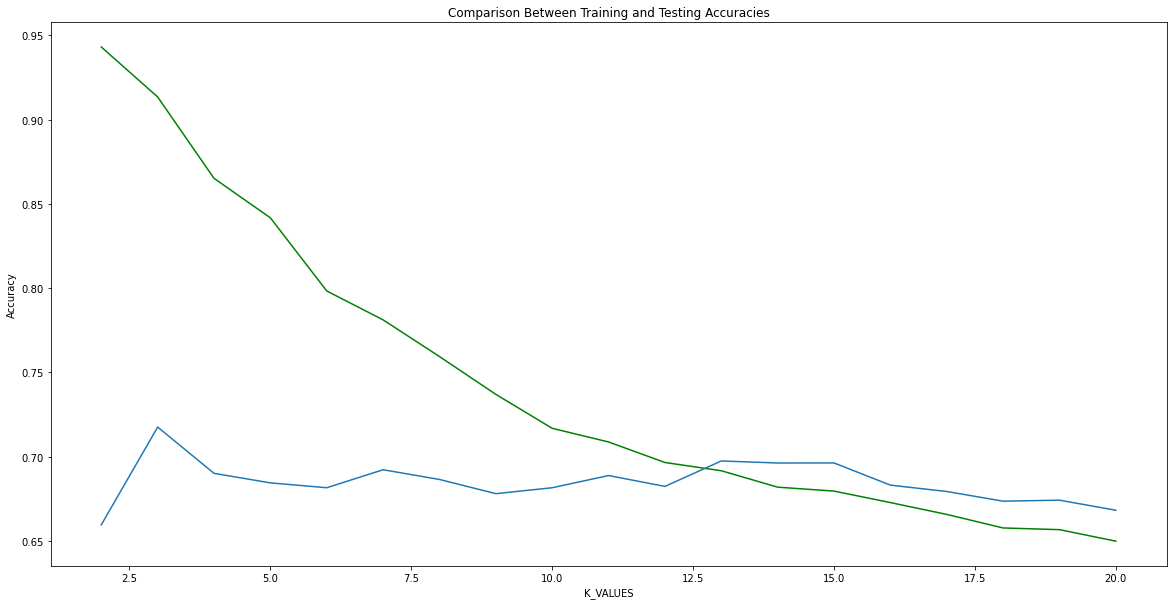

In [64]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(normal_train_df,y_train)
    # Training
    r2_train = knn_reg.score(normal_train_df,y_train)
    r2_train_list.append(r2_train)
    # Testing
    r2_test = knn_reg.score(normal_test_df,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color="green")
plt.plot(k_values,r2_test_list)
plt.xlabel("K_VALUES")
plt.ylabel("Accuracy")
plt.title("Comparison Between Training and Testing Accuracies")



Text(0.5, 1.0, 'Comparison Between Training and Testing Accuracies')

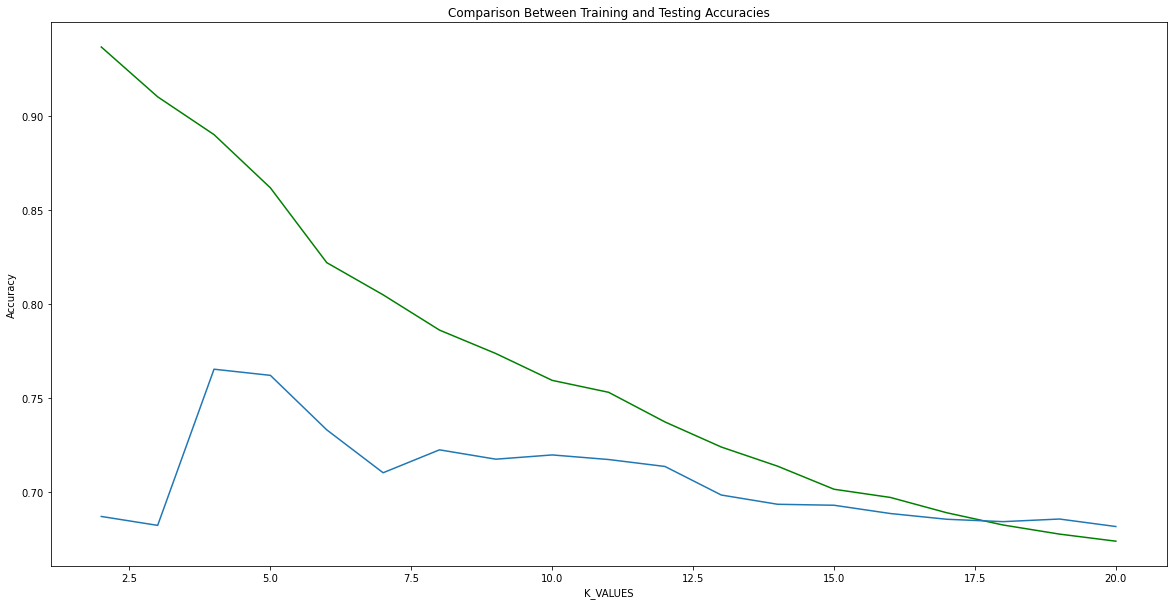

In [65]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(normal_train_df,y_train)
    # Training
    r2_train = knn_reg.score(normal_train_df,y_train)
    r2_train_list.append(r2_train)
    # Testing
    r2_test = knn_reg.score(normal_test_df,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color="green")
plt.plot(k_values,r2_test_list)
plt.xlabel("K_VALUES")
plt.ylabel("Accuracy")
plt.title("Comparison Between Training and Testing Accuracies")



## 2) Standardization

In [66]:
std_scalar = StandardScaler()
std_scalar.fit(x_train)
array = std_scalar.transform(x_train)
std_train_df = pd.DataFrame(array,columns=x_train.columns)
# std_train_df

In [67]:
# without scaling and without hyperparamtere
# with hyperparameter but without scaling
# both

In [68]:
knn_reg = KNeighborsRegressor(n_neighbors=2,p=1) # k=5,p=2 (E.D)
knn_reg.fit(std_train_df,y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [69]:
# Training
y_pred_train = knn_reg.predict(std_train_df)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)

R2_Score = r2_score(y_train,y_pred_train)
print("R2 score",R2_Score)

MSE 5.13029702970297
mae 1.4801980198019802
R2 score 0.9389106176603894


In [70]:
# Testing
array = std_scalar.transform(x_test)
std_test_df = pd.DataFrame(array,columns=x_test.columns)
# normal_test_df

y_pred_test = knn_reg.predict(std_test_df)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)

R2_Score = r2_score(y_test,y_pred_test)
print("R2 score",R2_Score)

MSE 25.401544117647052
mae 2.897549019607842
R2 score 0.7039368435290714


## Hyper paramter

Text(0.5, 1.0, 'Comparison Between Training and Testing Accuracies')

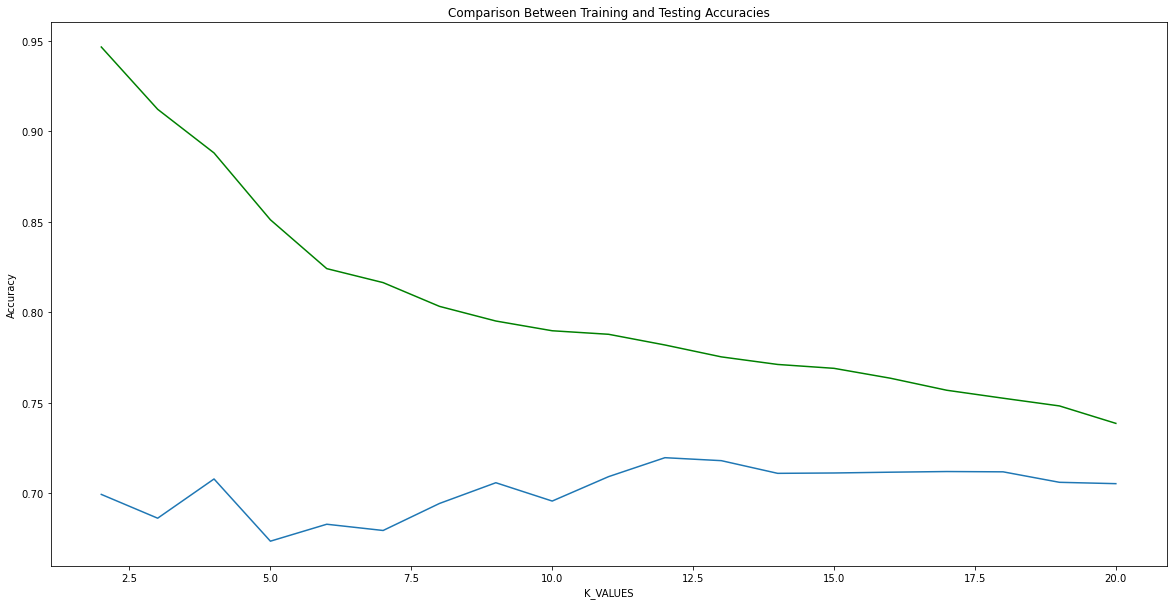

In [71]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(std_train_df,y_train)
    # Training
    r2_train = knn_reg.score(std_train_df,y_train)
    r2_train_list.append(r2_train)
    # Testing
    r2_test = knn_reg.score(std_test_df,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color="green")
plt.plot(k_values,r2_test_list)
plt.xlabel("K_VALUES")
plt.ylabel("Accuracy")
plt.title("Comparison Between Training and Testing Accuracies")



Text(0.5, 1.0, 'Comparison Between Training and Testing Accuracies')

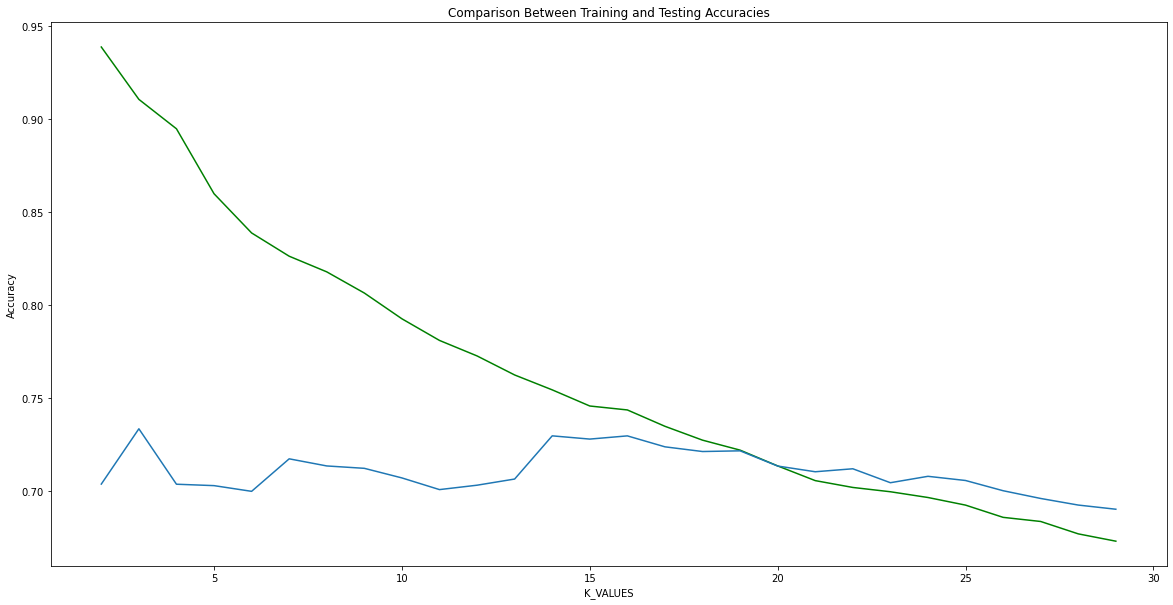

In [72]:
r2_train_list = []
r2_test_list = []
k_values = range(2,30)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(std_train_df,y_train)
    # Training
    r2_train = knn_reg.score(std_train_df,y_train)
    r2_train_list.append(r2_train)
    # Testing
    r2_test = knn_reg.score(std_test_df,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color="green")
plt.plot(k_values,r2_test_list)
plt.xlabel("K_VALUES")
plt.ylabel("Accuracy")
plt.title("Comparison Between Training and Testing Accuracies")

